## Model Data:

### Using a combination of governance characteristics and organizational characteristics (revenue, assets, ect.) I will predict the salary of Directors & Trustees.

In [26]:
# import time start_time = time.time() model() end_time = time.time()

# time_taken = end_time - start_time

In [38]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import plotly.express as px
# plt.style.use('bmh')
import warnings
# from pandas.core.common import SettingWithCopyWarning
# warnings.simplefilter(action="ignore", category=[SettingWithCopyWarning, FutureWarning])


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
import statsmodels.api as sm
from sklearn import linear_model

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import jenkspy


from sklearn.preprocessing import power_transform

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV

## IMPORT DATA

In [41]:
# import modeling dataset
df = pd.read_csv('02.data/model_dataset.csv')

In [42]:
df.head()

,reportable_comp,subsection,state,formation_yr,assets,liabilities,expenses,revenue,state_median_income,ntee_letter,total_ex_comp_per_company,percent_of_total_ex_comp,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,salaries_expense_tot_curyr,label
0,200807.0,501(c)(12),ME,1940,45959786,32926854.0,16128926.0,16128926.0,56277,W,200807,1.000000,11,11,37,0,1753677,3
1,93151.0,501(c)(5),ME,1937,1583360,521856.0,2404294.0,3013154.0,56277,J,410827,0.226740,7,4,22,0,1205249,7
2,99284.0,501(c)(5),ME,1937,1583360,521856.0,2404294.0,3013154.0,56277,J,410827,0.241669,7,4,22,0,1205249,7
3,111331.0,501(c)(5),ME,1937,1583360,521856.0,2404294.0,3013154.0,56277,J,410827,0.270992,7,4,22,0,1205249,7
4,107061.0,501(c)(5),ME,1937,1583360,521856.0,2404294.0,3013154.0,56277,J,410827,0.260599,7,4,22,0,1205249,7


## Random Forrest Models

### Random Forrest Regressor - feature iteration 1

In [47]:
# assign X and y variables
y = df.reportable_comp
X = pd.get_dummies(df.drop('reportable_comp', axis=1))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
rfr = ensemble.RandomForestRegressor()

rfr = rfr.fit(X, y)

cross_val_score(rfr, X, y, cv=5)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



array([0.96939105, 0.96386559, 0.88595604, 0.89566169, 0.90840717])

In [58]:
f_importances = pd.DataFrame(rfr.feature_importances_,
                            X.columns,
                            columns=['importance']).sort_values('importance', ascending=False)
f_importances.head(10)*100

,importance
total_ex_comp_per_company,54.730670
percent_of_total_ex_comp,42.952827
voting_indepmemb_ct,0.738013
volunteer_tot_ct,0.205491
state_median_income,0.203759
formation_yr,0.182447
employee_tot_ct,0.181258
assets,0.105723
state_MO,0.105278
liabilities,0.086195


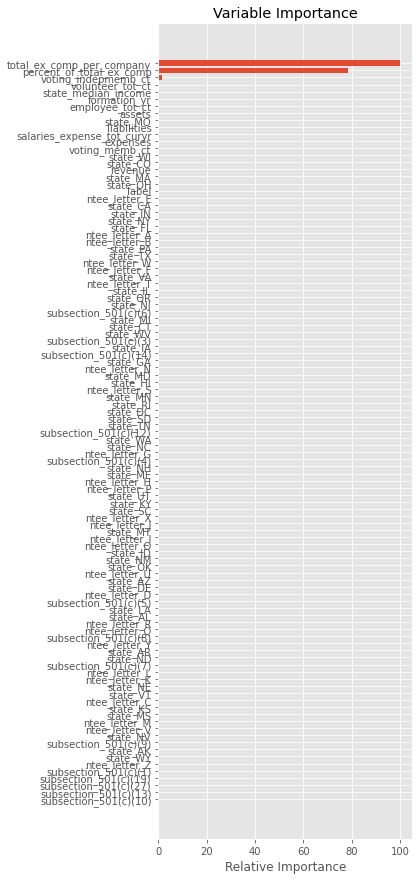

In [51]:
# visualize feature importances
plt.figure(figsize=(10, 15))

feature_importance = 100.0 * (rfr.feature_importances_ / rfr.feature_importances_.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance');

With so many organizations only paying a single executive, the top two features are playing a disproportionate weight in prediction.

### Random Forrest Regressor - feature iteration 2

In [59]:
df

,reportable_comp,subsection,state,formation_yr,assets,liabilities,expenses,revenue,state_median_income,ntee_letter,total_ex_comp_per_company,percent_of_total_ex_comp,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,salaries_expense_tot_curyr,label
0,200807.0,501(c)(12),ME,1940,45959786,32926854.0,16128926.0,16128926.0,56277,W,200807,1.000000,11,11,37,0,1753677,3
1,93151.0,501(c)(5),ME,1937,1583360,521856.0,2404294.0,3013154.0,56277,J,410827,0.226740,7,4,22,0,1205249,7
2,99284.0,501(c)(5),ME,1937,1583360,521856.0,2404294.0,3013154.0,56277,J,410827,0.241669,7,4,22,0,1205249,7
3,111331.0,501(c)(5),ME,1937,1583360,521856.0,2404294.0,3013154.0,56277,J,410827,0.270992,7,4,22,0,1205249,7
4,107061.0,501(c)(5),ME,1937,1583360,521856.0,2404294.0,3013154.0,56277,J,410827,0.260599,7,4,22,0,1205249,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27467,116062.0,501(c)(7),HI,2000,43416392,685776.0,9750160.0,6235944.0,77765,N,410040,0.283050,189,189,70,0,3731993,7
27468,293978.0,501(c)(7),HI,2000,43416392,685776.0,9750160.0,6235944.0,77765,N,410040,0.716950,189,189,70,0,3731993,7
27469,129494.0,501(c)(5),HI,1963,3395950,1491185.0,1720221.0,1865376.0,77765,Q,129494,1.000000,17,15,24,0,712399,0
27470,93746.0,501(c)(3),HI,1965,30706549,1415457.0,14900828.0,14374374.0,77765,P,172346,0.543941,20,20,314,555,9759364,2


In [62]:
# assign X and y variables
y = df.reportable_comp
X = pd.get_dummies(df.drop(['reportable_comp',
                           'total_ex_comp_per_company',
                           'percent_of_total_ex_comp'], axis=1))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
rfr = ensemble.RandomForestRegressor()

rfr = rfr.fit(X, y)

cross_val_score(rfr, X, y, cv=5)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



array([ 0.25731188,  0.15629448,  0.16719772, -0.26482974, -0.20135906])

In [75]:
f_importances = pd.DataFrame(rfr.feature_importances_,
                            X.columns,
                            columns=['importance']).sort_values('importance', ascending=False)
f_importances.head(10)*100

,importance
salaries_expense_tot_curyr,37.313954
liabilities,11.881815
voting_memb_ct,7.726956
formation_yr,6.075011
expenses,5.360654
employee_tot_ct,4.809649
assets,3.740026
volunteer_tot_ct,2.628685
voting_indepmemb_ct,2.580530
revenue,2.458578


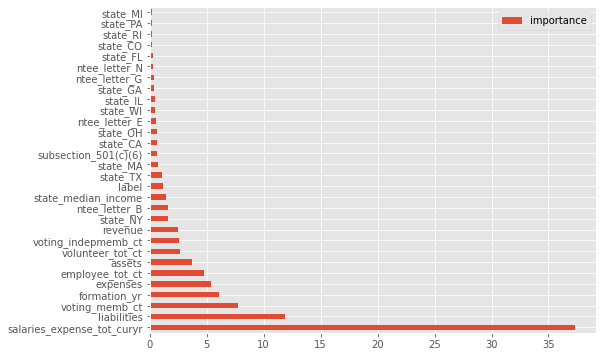

In [76]:
(f_importances.head(30)*100).plot(kind='barh', figsize=(8, 6))

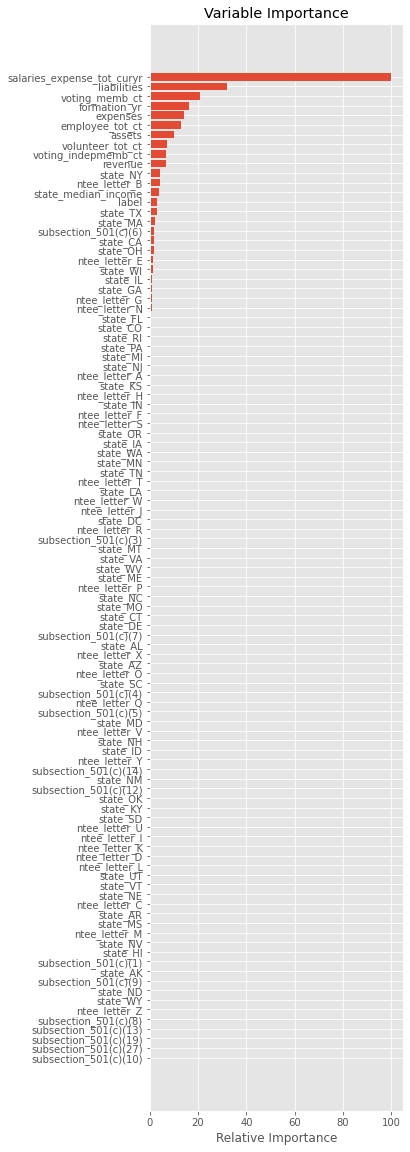

In [77]:
# visualize feature importances
plt.figure(figsize=(10, 20))

feature_importance = 100.0 * (rfr.feature_importances_ / rfr.feature_importances_.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance');

### Random Forrest Regressor - feature iteration 3, select only top 20 features by importance

In [81]:
f_importances.head(20).index

Index(['salaries_expense_tot_curyr', 'liabilities', 'voting_memb_ct',
       'formation_yr', 'expenses', 'employee_tot_ct', 'assets',
       'volunteer_tot_ct', 'voting_indepmemb_ct', 'revenue', 'state_NY',
       'ntee_letter_B', 'state_median_income', 'label', 'state_TX', 'state_MA',
       'subsection_501(c)(6)', 'state_CA', 'state_OH', 'ntee_letter_E'],
      dtype='object')

In [85]:
# subset full columns based on feature importance
pd.get_dummies(df.drop(['reportable_comp',
                           'total_ex_comp_per_company',
                           'percent_of_total_ex_comp'], axis=1))[['salaries_expense_tot_curyr', 'liabilities', 'voting_memb_ct',
       'formation_yr', 'expenses', 'employee_tot_ct', 'assets',
       'volunteer_tot_ct', 'voting_indepmemb_ct', 'revenue', 'state_NY',
       'ntee_letter_B', 'state_median_income', 'label', 'state_TX', 'state_MA',
       'subsection_501(c)(6)', 'state_CA', 'state_OH', 'ntee_letter_E']]

,salaries_expense_tot_curyr,liabilities,voting_memb_ct,formation_yr,expenses,employee_tot_ct,assets,volunteer_tot_ct,voting_indepmemb_ct,revenue,state_NY,ntee_letter_B,state_median_income,label,state_TX,state_MA,subsection_501(c)(6),state_CA,state_OH,ntee_letter_E
0,1753677,32926854.0,11,1940,16128926.0,37,45959786,0,11,16128926.0,0,0,56277,3,0,0,0,0,0,0
1,1205249,521856.0,7,1937,2404294.0,22,1583360,0,4,3013154.0,0,0,56277,7,0,0,0,0,0,0
2,1205249,521856.0,7,1937,2404294.0,22,1583360,0,4,3013154.0,0,0,56277,7,0,0,0,0,0,0
3,1205249,521856.0,7,1937,2404294.0,22,1583360,0,4,3013154.0,0,0,56277,7,0,0,0,0,0,0
4,1205249,521856.0,7,1937,2404294.0,22,1583360,0,4,3013154.0,0,0,56277,7,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27467,3731993,685776.0,189,2000,9750160.0,70,43416392,0,189,6235944.0,0,0,77765,7,0,0,0,0,0,0
27468,3731993,685776.0,189,2000,9750160.0,70,43416392,0,189,6235944.0,0,0,77765,7,0,0,0,0,0,0
27469,712399,1491185.0,17,1963,1720221.0,24,3395950,0,15,1865376.0,0,0,77765,0,0,0,0,0,0,0
27470,9759364,1415457.0,20,1965,14900828.0,314,30706549,555,20,14374374.0,0,0,77765,2,0,0,0,0,0,0


In [86]:
# assign X and y variables
y = df.reportable_comp
X = pd.get_dummies(df.drop(['reportable_comp',
                           'total_ex_comp_per_company',
                           'percent_of_total_ex_comp'], axis=1))[['salaries_expense_tot_curyr', 'liabilities', 'voting_memb_ct',
       'formation_yr', 'expenses', 'employee_tot_ct', 'assets',
       'volunteer_tot_ct', 'voting_indepmemb_ct', 'revenue', 'state_NY',
       'ntee_letter_B', 'state_median_income', 'label', 'state_TX', 'state_MA',
       'subsection_501(c)(6)', 'state_CA', 'state_OH', 'ntee_letter_E']]

In [87]:
rfr = ensemble.RandomForestRegressor()

rfr = rfr.fit(X, y)

cross_val_score(rfr, X, y, cv=5)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



array([ 0.23295721,  0.18575867,  0.12614115, -0.25103007, -0.07581687])

In [88]:
f_importances = pd.DataFrame(rfr.feature_importances_,
                            X.columns,
                            columns=['importance']).sort_values('importance', ascending=False)
f_importances.head(10)*100

,importance
salaries_expense_tot_curyr,37.115216
liabilities,13.514426
formation_yr,7.501613
expenses,7.216473
voting_memb_ct,6.903734
employee_tot_ct,5.184849
assets,4.516303
volunteer_tot_ct,3.999067
revenue,2.960849
voting_indepmemb_ct,2.099180


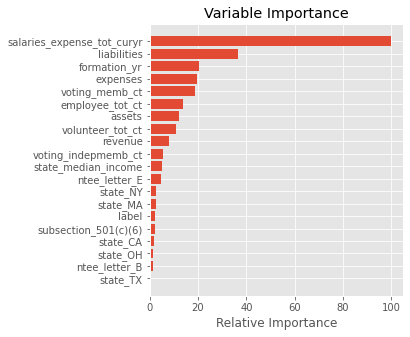

In [91]:
# visualize feature importances
plt.figure(figsize=(10, 5))

feature_importance = 100.0 * (rfr.feature_importances_ / rfr.feature_importances_.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance');

With so many organizations only paying a single executive, the top two features are playing a disproportionate weight in prediction.

## Support Vector Regressor

In [92]:
# assign X and y variables
y = df.reportable_comp
X = pd.get_dummies(df.drop(['reportable_comp',
                           'total_ex_comp_per_company',
                           'percent_of_total_ex_comp'], axis=1))

In [94]:
scaler = StandardScaler()
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

# must convert to array and reshape
# otherwise error message
y = sc_y.fit_transform(np.array(y).reshape(-1, 1))

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [96]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')

In [98]:
svr.fit(X_train, y_train)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [99]:
cross_val_score(svr, X, y, cv=3)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this 

array([0.19444398, 0.1853077 , 0.19925701])

Support vector isn't any better, however it is more consistent.

## Gradient Boost

In [100]:
# assign X and y variables
y = df.reportable_comp
X = pd.get_dummies(df.drop(['reportable_comp',
                           'total_ex_comp_per_company',
                           'percent_of_total_ex_comp'], axis=1))

In [232]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [102]:
gbr = ensemble.GradientBoostingRegressor()

cross_val_score(gbr, X, y, cv=5)

array([ 0.27741473,  0.23696106,  0.25034724,  0.10765233, -0.12545973])

Gradient boost is doing quite a bit better than random forrest and support vector, however it seems more prone to overfitting. 

In [35]:
# param_test = {'n_estimators': range(100, 1001, 100),
#               'learning_rate': [0.05, .1, .5],
#               'max_depth': [2, 3, 6],
#               'subsample': [.5, 1]}

# gbr = ensemble.GradientBoostingRegressor()
# # gbr.fit(X_train, y_train)


# gsearch = GridSearchCV(gbr, 
#            param_grid = param_test, 
#            n_jobs=4, iid=False, cv=5)

# gsearch.fit(X_train, y_train)

The above ran for hours, eventually I had to stop it.

### Tuned with RandomizedSearchCV 

In [40]:
# assign X and y variables
y = comp.reportable_comp
X = pd.get_dummies(comp[['subsection',
     'state',
      'formation_yr',
      'assets',
      'liabilities',
      'expenses',
      'revenue',
      'ntee_letter']])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# rfr = ensemble.RandomForestRegressor()

# param_test = {'n_estimators': range(100, 1501, 100),
#               'max_features': ['auto', 'sqrt'],
#               'min_samples_leaf': [1, 2, 4],
#               'min_samples_split': [2, 5, 10],
#               'max_depth': range(10, 51, 10)}

# gsearch = RandomizedSearchCV(estimator=rfr, 
#            param_distributions= param_test, 
#            n_jobs=-1,
#             n_iter=50,
#            iid=False, 
#             cv=3,
#             random_state=42)

# gsearch.fit(X_train, y_train)

This took forever, eventually I had to stop it.

### Random Forrest Classifier

In [103]:
jenkspy.jenks_breaks(comp.reportable_comp,nb_class=10)

[46196.0,
 163936.0,
 301114.0,
 496843.0,
 777849.0,
 1217614.0,
 1992485.0,
 3311074.0,
 5491764.0,
 10663333.0,
 18169121.0]

In [114]:
pd.cut(comp.reportable_comp,
        bins=jenkspy.jenks_breaks(comp.reportable_comp,nb_class=10),
        include_lowest=True).value_counts()

(46195.999, 163936.0]       13121
(163936.0, 301114.0]         8087
(301114.0, 496843.0]         3867
(496843.0, 777849.0]         1826
(777849.0, 1217614.0]         787
(1217614.0, 1992485.0]        370
(1992485.0, 3311074.0]         88
(3311074.0, 5491764.0]         42
(5491764.0, 10663333.0]        11
(10663333.0, 18169121.0]        2
Name: reportable_comp, dtype: int64

In [110]:
# assign X and y variables
y = pd.cut(df.reportable_comp,
        bins=jenkspy.jenks_breaks(df.reportable_comp,nb_class=10),
        include_lowest=True)
X = pd.get_dummies(df.drop(['reportable_comp',
                           'total_ex_comp_per_company',
                           'percent_of_total_ex_comp'], axis=1))

In [111]:
y.shape

(27472,)

In [112]:
X.shape

(27472, 103)

In [113]:
rfc = ensemble.RandomForestClassifier()

cross_val_score(rfc, X, y, cv=5)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning:

From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.



ValueError: Unknown label type: 'unknown'

Unclear why I am getting this error.

It definitely seems to be overfitting in some iterations.

## CatBoostRegressor
https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/

In [25]:
from catboost import CatBoostRegressor

In [26]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
model=CatBoostRegressor(iterations=100, depth=3, learning_rate=0.1, loss_function='RMSE')

model.fit(X_train, y_train, cat_features=categorical_features_indices, eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 346199.5867294	test: 425891.1654796	best: 425891.1654796 (0)	total: 90ms	remaining: 8.91s
1:	learn: 339859.1934928	test: 421018.6441582	best: 421018.6441582 (1)	total: 101ms	remaining: 4.96s
2:	learn: 334210.8992364	test: 416667.9080402	best: 416667.9080402 (2)	total: 108ms	remaining: 3.48s
3:	learn: 329185.0227775	test: 412893.7655936	best: 412893.7655936 (3)	total: 113ms	remaining: 2.71s
4:	learn: 324776.8431914	test: 409672.4056036	best: 409672.4056036 (4)	total: 125ms	remaining: 2.38s
5:	learn: 321297.0727131	test: 407141.3090288	best: 407141.3090288 (5)	total: 130ms	remaining: 2.04s
6:	learn: 317938.1414795	test: 404118.9842425	best: 404118.9842425 (6)	total: 136ms	remaining: 1.81s
7:	learn: 315242.0242006	test: 402238.4429936	best: 402238.4429936 (7)	total: 143ms	remaining: 1.64s
8:	learn: 312780.3586916	test: 400548.0606356	best: 400548.0606356 (8)	total: 148ms	remaining: 1.49s
9:	learn: 310518.8830366	test: 398644.2616672	best: 398644.2616672 (9)	total: 153ms	remainin

In [29]:
model.get_feature_importance()

array([7.54108752e+00, 5.81532553e+00, 2.94551008e+01, 1.62312278e+01,
       1.92067148e+01, 5.77052772e-01, 1.39353534e+00, 2.54033190e+00,
       7.50294138e-01, 4.62136733e+00, 1.13597010e+00, 0.00000000e+00,
       0.00000000e+00, 3.60254455e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.53889742e+00, 0.00000000e+00, 4.93577703e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.59363635e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.39638447e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.42342624e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [30]:
feature_importances = model.get_feature_importance()
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

liabilities: 29.455100774049534
revenue: 19.20671481409793
expenses: 16.231227758276276
formation_yr: 7.541087524201877
assets: 5.815325526183407
state_median_income: 4.621367334479104
ntee_letter_E: 4.552865451627046
employee_tot_ct: 2.5403318981222323
state_MO: 2.4234262404711058
subsection_501(c)(6): 1.5388974203297232
ntee_letter_G: 1.5042812122278553
voting_indepmemb_ct: 1.3935353449888526
label: 1.1359701026889397
volunteer_tot_ct: 0.7502941375693764
voting_memb_ct: 0.5770527717341256
state_NY: 0.17445593460429698
state_MA: 0.13963844655149177
ntee_letter_W: 0.11273154704838714
state_DC: 0.08593636348373891
subsection_501(c)(8): 0.04935777032537375
ntee_letter_N: 0.04762334319228245
state_WI: 0.03822558750212381
subsection_501(c)(12): 0.03602544547634361
ntee_letter_P: 0.028527250768585085
subsection_501(c)(9): 0.0
subsection_501(c)(7): 0.0
subsection_501(c)(5): 0.0
subsection_501(c)(4): 0.0
subsection_501(c)(3): 0.0
subsection_501(c)(27): 0.0
subsection_501(c)(19): 0.0
subsectio

In [17]:
cross_val_score(model, X, y, cv=5)

0:	learn: 292707.0529362	total: 7.41ms	remaining: 363ms
1:	learn: 290992.5949683	total: 10.6ms	remaining: 255ms
2:	learn: 289207.6580168	total: 14.5ms	remaining: 227ms
3:	learn: 287588.9135369	total: 17.8ms	remaining: 204ms
4:	learn: 286130.2751342	total: 21.3ms	remaining: 191ms
5:	learn: 284857.6356253	total: 30.3ms	remaining: 222ms
6:	learn: 283959.4549803	total: 33.5ms	remaining: 206ms
7:	learn: 283217.6430999	total: 36.7ms	remaining: 193ms
8:	learn: 282277.0224137	total: 39.6ms	remaining: 180ms
9:	learn: 281602.6144939	total: 42.5ms	remaining: 170ms
10:	learn: 280603.4842554	total: 46ms	remaining: 163ms
11:	learn: 279934.6678163	total: 49.1ms	remaining: 156ms
12:	learn: 279345.9134658	total: 52ms	remaining: 148ms
13:	learn: 278907.6722047	total: 54.9ms	remaining: 141ms
14:	learn: 278553.1291218	total: 57.9ms	remaining: 135ms
15:	learn: 278198.7115048	total: 61.2ms	remaining: 130ms
16:	learn: 277801.6810881	total: 64.2ms	remaining: 125ms
17:	learn: 277147.2506644	total: 67.2ms	remai

array([0.20238705, 0.10284486, 0.08434448, 0.09692574, 0.15239342])

This is no better than when I did random forest before.

In [ ]:
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [364]:
gsearch.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 950, 'subsample': 0.8}

## SPARE PARTS

In [6]:
# jenkspy.jenks_breaks(comp.reportable_comp,nb_class=10)

In [7]:
# comp['comp_breaks'] = pd.cut(comp.reportable_comp,
#                             bins=jenkspy.jenks_breaks(comp.reportable_comp,nb_class=10),
#                             include_lowest=True)

In [8]:
# comp.comp_breaks.value_counts()

## Linear Regression Modeling

<a id="split_data"></a>

### Split data to be able to test the model on data it hasn't seen before

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

The number of observations in training set is 32077
The number of observations in test set is 8020


In [149]:
# add a constant to the model, the “baseline” 
# of the data in case all of your features values are 0.

X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# show the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        reportable_comp   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     86.80
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:02:38   Log-Likelihood:            -3.9201e+05
No. Observations:               32077   AIC:                         7.842e+05
Df Residuals:                   31981   BIC:                         7.850e+05
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.537e+04    276.841    163.899      0.0

<a id="access_fit_predict"></a>

### Access fit and predict

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



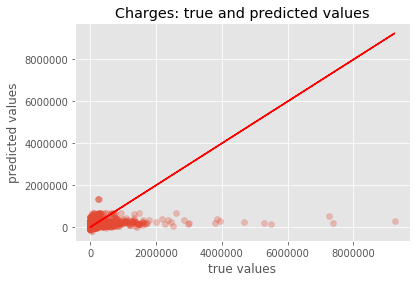

In [38]:
# We add constant to the model as it's a best practice
# to do so every time
X_test = sm.add_constant(X_test)

# make predictions
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds, alpha=.3)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()


Huge outliers are skewing the model.

<a id="linear"></a>
### Linear Regression with sklearn

In [41]:
# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.08970151174889418
-----Test set statistics-----
R-squared of the model in the test set is: 0.09753413006180345
Mean absolute error of the prediction is: 84681.96918461511
Mean squared error of the prediction is: 63433530856.020424
Root mean squared error of the prediction is: 251860.14145954183
Mean absolute percentage error of the prediction is: 6559.082507499294


## Examine assumptions of linear regression

#### 2. the error term should be zero on average


In [65]:
lrm.fit(X, y)
predictions = lrm.predict(X)
errors = y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -4.041452676836004e-11


Since I have included the constant term in the model, the average of the model's error is effectively zero.

#### 3. homoscedasticity - the distribution of its error terms (known as "scedasticity") is consistent for all predicted values

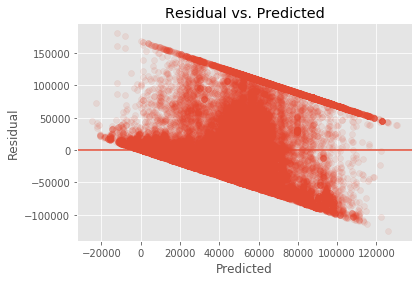

In [66]:
plt.scatter(predictions, errors, alpha=.1)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Visually, it appears to not be homoscedastic.

In [67]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 15938.4 and p value is 0
Levene test statistic value is 7635.08 and p value is 0


The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

<font color=red> Some fixes to heteroscedasticity include transforming the dependent variable (see [Box Cox transformation](https://www.statisticshowto.datasciencecentral.com/box-cox-transformation/) and [log transformation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/)) and adding features that target the poorly-estimated areas.</font>

#### 4. low multicollinearity

(97.0, 0.0)

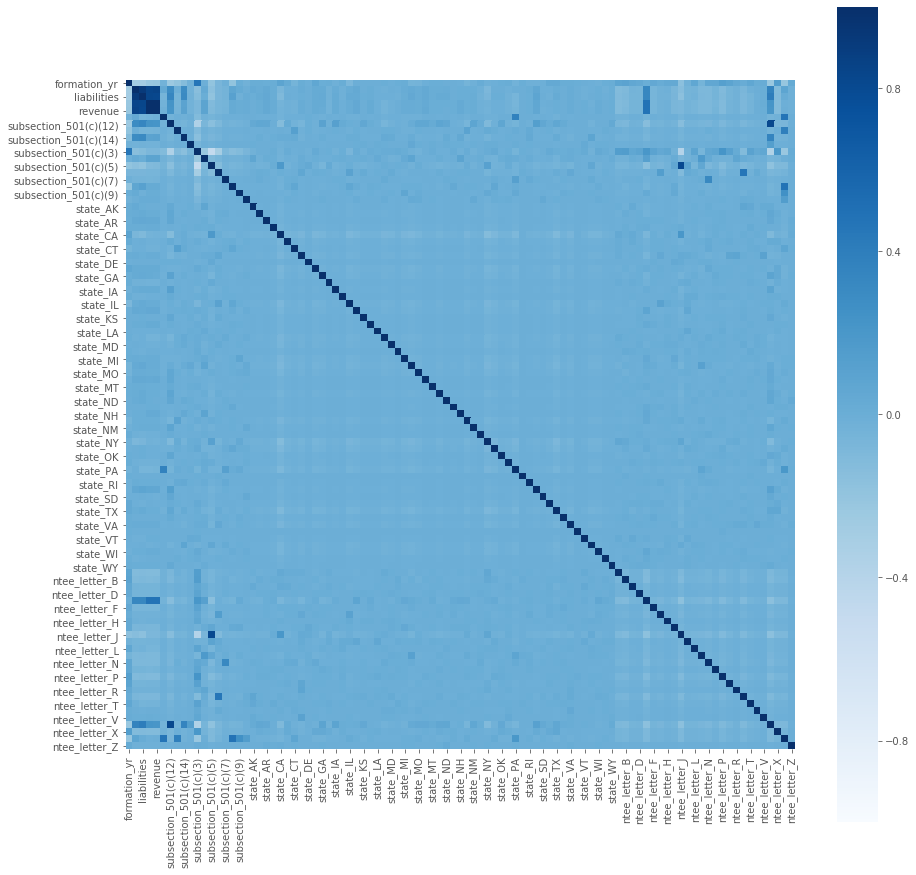

In [70]:
# compare features using a heatmap
plt.figure(figsize=(15, 15))

ax = sns.heatmap(X.corr(), 
                 vmin=-1, vmax=1, center=0, 
                 square=True, annot=False, 
                 cmap="Blues")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

It doesn't seem that many of them are very correlated, especially not neighborhoods.

#### 5. error terms should be uncorrelated with one another


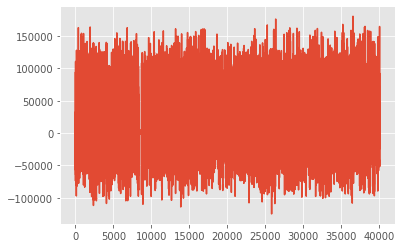

In [71]:
plt.plot(errors)

#### 6. features shouldn't be correlated with the errors


Arguably the most important assumption: explanatory variables and errors should be independent. If this assumption doesn't hold, then the model's predictions will be unreliable as the estimates of the coefficients would be biased. This assumption is known as the **exogeneity**.

Violations of the exogeneity assumption may have several sources. Common causes are omitted variables and simultaneous causation between independent variables and the target. If the problem stems from simultaneous causation then we need to apply some advanced techniques to solve for the issue but this is beyond the scope of this bootcamp.

#### 7. normality of the errors

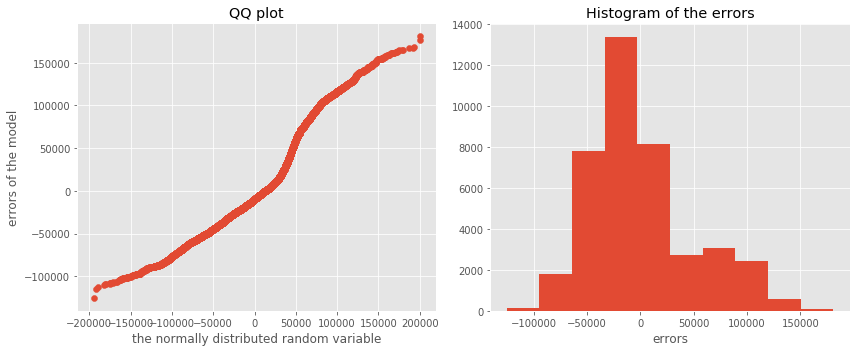

In [73]:
# check for the normality of the errors
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()

The errors seems to be roughly normal, but not perfectly normal through visual inspection.

In [74]:
# check for normality using statistical tests

from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 4879.603431954727 and p value is 0.0
Normality test statistics is 3742.8224041490826 and p value is 0.0


The super small p-value result from each of these tests indicate that my errors are not normally distributed.

<a id="elastic"></a>
### ElasticNet Regression

In [108]:
# assign X and y variables
y = comp.reportable_comp
X = pd.get_dummies(comp[['subsection',
     'state',
      'formation_yr',
      'assets',
      'liabilities',
      'expenses',
      'revenue',
      'ntee_letter']])

In [107]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [117]:
scaler = StandardScaler()


In [119]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [120]:
X_trans = scaler.transform(X)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size = 0.2, random_state = 42)

In [147]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5, max_iter=3000)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 30738269712426.293, tolerance: 7813320277.594606

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 30936828507175.953, tolerance: 7813320277.594606

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 30930903640350.44, tolerance: 7813320277.594606

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 30930345024576.723, tol

Best alpha value is: 1e-06
R-squared of the model in training set is: 0.20505392516109822
-----Test set statistics-----
R-squared of the model in test set is: 0.21385814412382484
Mean absolute error of the prediction is: 37764.75598698567
Mean squared error of the prediction is: 2424135145.216482
Root mean squared error of the prediction is: 49235.50695602191
Mean absolute percentage error of the prediction is: 4662.967457268848


C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 38688090350368.2, tolerance: 9733493359.57815



## Linear Regression - Outliers Removed

In [42]:
# assign X and y variables
y = comp.reportable_comp
X = pd.get_dummies(comp[['subsection',
     'state',
      'formation_yr',
      'assets',
      'liabilities',
      'expenses',
      'revenue',
      'ntee_letter']])

In [44]:
X.iloc[:,0:5]

,formation_yr,assets,liabilities,expenses,revenue
0,2006.0,2112293,92283.0,500749.0,1792933.0
1,2006.0,2112293,92283.0,500749.0,1792933.0
2,2007.0,97123,13093.0,1251188.0,1294636.0
3,2007.0,97123,13093.0,1251188.0,1294636.0
4,2008.0,4161179,120847.0,881055.0,795668.0
...,...,...,...,...,...
40092,1978.0,2754244,28296.0,359991.0,554329.0
40093,1984.0,3187428,2977061.0,4465050.0,3679726.0
40094,1981.0,327992,9503.0,473584.0,475958.0
40095,1981.0,327992,9503.0,473584.0,475958.0


In [45]:
# trim at 90th percentile
for column in X.iloc[:,0:5]:
    X[column].clip(upper=X[column].quantile(.9), inplace=True)

y.clip(upper=y.quantile(.9), inplace=True)

<a id="split_data"></a>

### Split data to be able to test the model on data it hasn't seen before

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [56]:
# add a constant to the model, the “baseline” 
# of the data in case all of your features values are 0.

X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# show the summary results
print(results.summary())

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



                            OLS Regression Results                            
Dep. Variable:        reportable_comp   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     90.09
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:08:21   Log-Likelihood:            -3.9189e+05
No. Observations:               32077   AIC:                         7.840e+05
Df Residuals:                   31981   BIC:                         7.848e+05
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.22e+

<a id="access_fit_predict"></a>

### Access fit and predict

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



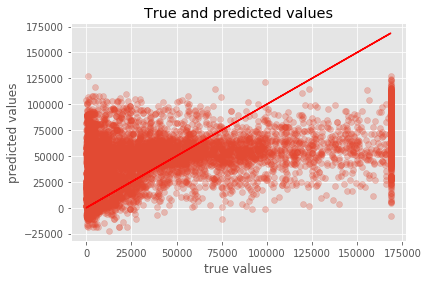

In [59]:
# We add constant to the model as it's a best practice
# to do so every time
X_test = sm.add_constant(X_test)

# make predictions
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds, alpha=.3)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("True and predicted values")
plt.show()


<a id="linear"></a>
### Linear Regression with sklearn

In [58]:
# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.21111563121754984
-----Test set statistics-----
R-squared of the model in the test set is: 0.22083257930024625
Mean absolute error of the prediction is: 37673.80045847963
Mean squared error of the prediction is: 2402695462.9157667
Root mean squared error of the prediction is: 49017.297588869245
Mean absolute percentage error of the prediction is: 4578.8361807000765


## Linear Regression - Outliers Removed Features transformed with Box-Cox

In [91]:
# assign X and y variables
y = comp.reportable_comp
X = pd.get_dummies(comp[['subsection',
     'state',
      'formation_yr',
      'assets',
      'liabilities',
      'expenses',
      'revenue',
      'ntee_letter']])

In [92]:
# trim at 90th percentile
for column in X.iloc[:,0:5]:
    X[column].clip(upper=X[column].quantile(.9), inplace=True)

y.clip(upper=y.quantile(.9), inplace=True)

In [93]:
power_transform(X, method='box-cox')

ValueError: The Box-Cox transformation can only be applied to strictly positive data

In [96]:
X = X.transform(np.sqrt)

In [97]:
y = y.transform(np.sqrt)

<a id="split_data"></a>

### Split data to be able to test the model on data it hasn't seen before

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

ValueError: Found input variables with inconsistent numbers of samples: [39975, 40097]

In [100]:
X.isna().sum()

formation_yr      0
assets           20
liabilities      60
expenses          0
revenue          45
                 ..
ntee_letter_V     0
ntee_letter_W     0
ntee_letter_X     0
ntee_letter_Y     0
ntee_letter_Z     0
Length: 97, dtype: int64

In [104]:
# drop na values
X.dropna(how='any', axis='rows', inplace=True)

In [105]:
# add a constant to the model, the “baseline” 
# of the data in case all of your features values are 0.

X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# show the summary results
print(results.summary())

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



MissingDataError: exog contains inf or nans

<a id="access_fit_predict"></a>

### Access fit and predict

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



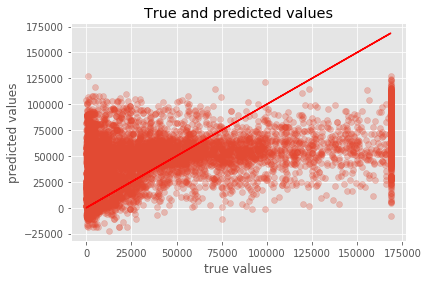

In [59]:
# We add constant to the model as it's a best practice
# to do so every time
X_test = sm.add_constant(X_test)

# make predictions
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds, alpha=.3)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("True and predicted values")
plt.show()


<a id="linear"></a>
### Linear Regression with sklearn

In [58]:
# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.21111563121754984
-----Test set statistics-----
R-squared of the model in the test set is: 0.22083257930024625
Mean absolute error of the prediction is: 37673.80045847963
Mean squared error of the prediction is: 2402695462.9157667
Root mean squared error of the prediction is: 49017.297588869245
Mean absolute percentage error of the prediction is: 4578.8361807000765
